<a href="https://colab.research.google.com/github/ahmed-gharib89/TensorFlow_2_for_Deep_Learning/blob/master/week3/Validation_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [3]:
# Load the diabetes dataset
# first we import the load_diabetes function from sklearn datasets
from sklearn.datasets import load_diabetes

# load the dataset
diabetes_dataset = load_diabetes()

print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
# print the keys of dataset dict
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
# Save the input and target variables
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [10]:
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [15]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data,
                                                                    targets,
                                                                    test_size=0.1)
print(f'Train Data Shape  : {train_data.shape}\n\
Test Data Shape   : {test_data.shape}\n\
Train Target Shape: {train_target.shape}\n\
Test Target Shape : {test_target.shape}\n')

Train Data Shape  : (397, 10)
Test Data Shape   : (45, 10)
Train Target Shape: (397,)
Test Target Shape : (45,)



#### Train a feedforward neural network model

In [27]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
                        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
                        Dense(128, activation='relu'),
                        Dense(128, activation='relu'),
                        Dense(128, activation='relu'),
                        Dense(128, activation='relu'),
                        Dense(128, activation='relu'),
                        Dense(1)
    ])
    return model

model = get_model()

In [28]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [29]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [30]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9871 - mae: 0.8533 - val_loss: 1.0796 - val_mae: 0.8844
Epoch 2/100
6/6 - 0s - loss: 0.9088 - mae: 0.8156 - val_loss: 0.9667 - val_mae: 0.8413
Epoch 3/100
6/6 - 0s - loss: 0.7167 - mae: 0.7105 - val_loss: 0.7184 - val_mae: 0.7254
Epoch 4/100
6/6 - 0s - loss: 0.5828 - mae: 0.6198 - val_loss: 0.7483 - val_mae: 0.7136
Epoch 5/100
6/6 - 0s - loss: 0.5260 - mae: 0.5711 - val_loss: 0.5404 - val_mae: 0.6315
Epoch 6/100
6/6 - 0s - loss: 0.4832 - mae: 0.5603 - val_loss: 0.7435 - val_mae: 0.7057
Epoch 7/100
6/6 - 0s - loss: 0.5007 - mae: 0.5718 - val_loss: 0.5618 - val_mae: 0.6255
Epoch 8/100
6/6 - 0s - loss: 0.4829 - mae: 0.5449 - val_loss: 0.4968 - val_mae: 0.5940
Epoch 9/100
6/6 - 0s - loss: 0.4581 - mae: 0.5435 - val_loss: 0.6607 - val_mae: 0.6777
Epoch 10/100
6/6 - 0s - loss: 0.4506 - mae: 0.5286 - val_loss: 0.4789 - val_mae: 0.5817
Epoch 11/100
6/6 - 0s - loss: 0.4467 - mae: 0.5296 - val_loss: 0.6493 - val_mae: 0.6700
Epoch 12/100
6/6 - 0s - loss: 0.4346 - ma

In [31]:
# Evaluate the model on the test set

loss, mae = model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.6129 - mae: 0.5555


#### Plot the learning curves

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

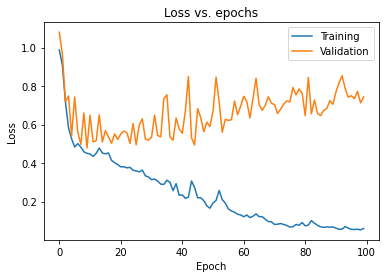

In [33]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [34]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [35]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.L2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [36]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [37]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 1.0031 - mae: 0.8570 - val_loss: 1.1074 - val_mae: 0.8938
Epoch 2/100
6/6 - 0s - loss: 0.9878 - mae: 0.8519 - val_loss: 1.0684 - val_mae: 0.8800
Epoch 3/100
6/6 - 0s - loss: 0.9457 - mae: 0.8375 - val_loss: 0.9178 - val_mae: 0.8173
Epoch 4/100
6/6 - 0s - loss: 0.8445 - mae: 0.7967 - val_loss: 0.7723 - val_mae: 0.7459
Epoch 5/100
6/6 - 0s - loss: 0.7570 - mae: 0.7575 - val_loss: 0.7905 - val_mae: 0.7541
Epoch 6/100
6/6 - 0s - loss: 0.6901 - mae: 0.7040 - val_loss: 0.6928 - val_mae: 0.7137
Epoch 7/100
6/6 - 0s - loss: 0.6416 - mae: 0.6536 - val_loss: 0.7136 - val_mae: 0.7032
Epoch 8/100
6/6 - 0s - loss: 0.5825 - mae: 0.6145 - val_loss: 0.6564 - val_mae: 0.6760
Epoch 9/100
6/6 - 0s - loss: 0.5657 - mae: 0.6097 - val_loss: 0.6155 - val_mae: 0.6568
Epoch 10/100
6/6 - 0s - loss: 0.5790 - mae: 0.6059 - val_loss: 0.6874 - val_mae: 0.6888
Epoch 11/100
6/6 - 0s - loss: 0.5791 - mae: 0.6242 - val_loss: 0.6109 - val_mae: 0.6589
Epoch 12/100
6/6 - 0s - loss: 0.5497 - ma

In [39]:
# Evaluate the model on the test set

model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.4300 - mae: 0.4819


[0.4300413429737091, 0.48191553354263306]

#### Plot the learning curves

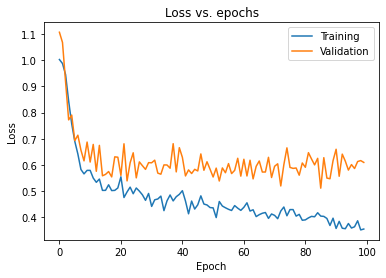

In [40]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [60]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):

    def on_train_begin(self, logs=None):
        print('Starting Training.....')

    def on_epoch_begin(self, epoch, logs=None):
        print(f'Starting Epoch: {epoch}')

    def on_train_batch_begin(self, batch, logs=None):
        print(f'Training: Starting Batch: {batch}')

    def on_train_batch_end(self, batch, logs=None):
        print(f'Finished Batch: {batch}')

    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished Epoch: {epoch}')

    def on_train_end(self, logs=None):
        print('Finished Training.')

In [61]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [66]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### Train the model with the callback

In [67]:
# Create the custom callback

class LossAndMetricCallback(tf.keras.callbacks.Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

In [68]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_target, epochs=3, batch_size=128, verbose=False, callbacks=[LossAndMetricCallback()])


 After batch 0, the loss is    1.02.

 After batch 2, the loss is    0.95.
Epoch 0: Average loss is    0.95, mean absolute error is    0.84.

 After batch 0, the loss is    0.90.

 After batch 2, the loss is    0.86.
Epoch 1: Average loss is    0.85, mean absolute error is    0.79.

 After batch 0, the loss is    0.73.

 After batch 2, the loss is    0.73.
Epoch 2: Average loss is    0.72, mean absolute error is    0.73.


In [45]:
# Write a custom callback

class TestingCallback(Callback):

    def on_test_begin(self, logs=None):
        print('Starting Testing.....')

    def on_test_batch_begin(self, batch, logs=None):
        print(f'Testing: Starting Batch: {batch}')

    def on_test_batch_end(self, batch, logs=None):
        print(f'Testing: Finished Batch: {batch}')

    def on_test_end(self, logs=None):
        print('Finished Testing.')

In [46]:
# Evaluate the model

model.evaluate(test_data, test_target, verbose=False, callbacks=[TestingCallback()])

Starting Testing.....
Testing: Starting Batch: 0
Testing: Finished Batch: 0
Testing: Starting Batch: 1
Testing: Finished Batch: 1
Finished Testing.


0.7781837582588196

In [50]:
# Write a custom callback

class PredictingCallback(Callback):

    def on_predict_begin(self, logs=None):
        print('Starting Predicting.....')

    def on_predict_batch_begin(self, batch, logs=None):
        print(f'Predicting: Starting Batch: {batch}')

    def on_predict_batch_end(self, batch, logs=None):
        print(f'Predicting: Finished Batch: {batch}')

    def on_predict_end(self, logs=None):
        print('Finished Predicting.')

In [48]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[PredictingCallback()])

Starting Predicting.....
Predicting: Starting Batch: 0
Predicting: Finished Batch: 0
Predicting: Starting Batch: 1
Predicting: Finished Batch: 1
Finished Predicting.


array([[-0.05424165],
       [-0.10911281],
       [-0.08959125],
       [ 0.08956826],
       [ 0.0783044 ],
       [ 0.04512144],
       [-0.0527911 ],
       [-0.06617888],
       [-0.01391801],
       [-0.04147674],
       [-0.0667254 ],
       [-0.08763725],
       [ 0.04951854],
       [ 0.06693789],
       [ 0.03511764],
       [-0.11931638],
       [ 0.08750266],
       [ 0.02364156],
       [-0.00203767],
       [ 0.05510078],
       [-0.09280336],
       [-0.10283444],
       [-0.0898924 ],
       [-0.10901394],
       [-0.10853596],
       [ 0.014686  ],
       [-0.00093204],
       [ 0.07445142],
       [-0.10771677],
       [-0.09310603],
       [-0.11194582],
       [-0.127108  ],
       [ 0.04452449],
       [-0.10586347],
       [ 0.01717679],
       [-0.08577758],
       [-0.00304753],
       [-0.0882428 ],
       [-0.00862279],
       [-0.10806479],
       [-0.0780841 ],
       [-0.00263427],
       [ 0.08747478],
       [ 0.0559458 ],
       [-0.05743476]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [69]:
# Re-train the unregularised model

unreg_model = get_model()
unreg_model.compile(optimizer='adam', loss='mse')

In [70]:
unreg_history = unreg_model.fit(train_data, train_target, epochs=100,
                                validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

In [71]:
# Evaluate the model on the test set

unreg_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.5059


0.5058756470680237

In [72]:
# Re-train the regularised model

reg_model = get_regularised_model(1e-8, 0.2)
reg_model.compile(optimizer='adam', loss='mse')
reg_history = unreg_model.fit(train_data, train_target, epochs=100,
                                validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

In [73]:
# Evaluate the model on the test set

reg_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.8531


0.8531281352043152

#### Plot the learning curves

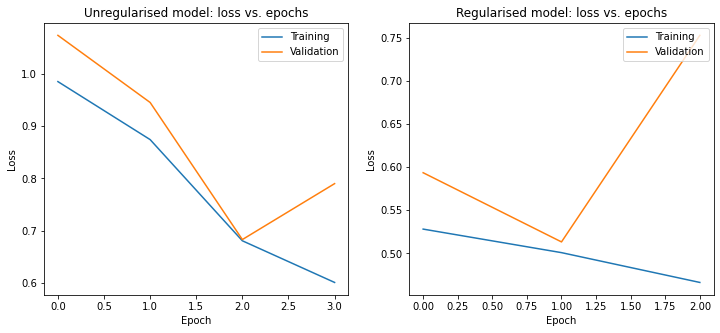

In [74]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()